<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [72]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load("en_core_web_lg")
from spacy.tokenizer import Tokenizer
from bs4 import BeautifulSoup
import requests

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [10]:
##### Your Code Here #####
data_folder = "/home/alex/code/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/"
file_path = "job_listings.csv"                

In [13]:
ds_df = pd.read_csv(data_folder + file_path)
ds_df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [66]:
def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text().replace("\\n","").replace("\\xc2\\xa8","").replace("\\xe2\\x80\\xa6","").replace("\\xe2\\x80\\x99","").replace("\\xe2\\x80\\x94","").replace("\\xe2\\x80\\x9c","").replace("\\xe2\\x80\\x9d","").replace("\\xe2\\x80\\x93","")

In [67]:
ds_df["cleaned_description"] = ds_df["description"].apply(clean_description)
ds_df.head()

,Unnamed: 0,description,title,cleaned_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:Conceptual understanding in..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job DescriptionAs a Data Scientist 1, you wi..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA multiple locations2+ years of...


## 2) Use Spacy to tokenize the listings 

In [ ]:
##### Your Code Here #####

In [73]:
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(ds_df["cleaned_description"], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

ds_df['tokens'] = tokens

ds_df.head()

,Unnamed: 0,description,title,cleaned_description,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:Conceptual understanding in...","[b""Job, Requirements:Conceptual, understanding..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job DescriptionAs a Data Scientist 1, you wi...","[b'Job, DescriptionAs, a, Data, Scientist, 1,,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA multiple locations2+ years of...,"[b'Location:, USA, , multiple, locations2+, y..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####

In [147]:
ds_df["token_count"] = ds_df["tokens"].apply(len)
ds_df.head()

,Unnamed: 0,description,title,cleaned_description,tokens,token_count
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:Conceptual understanding in...","[b""Job, Requirements:Conceptual, understanding...",110
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job DescriptionAs a Data Scientist 1, you wi...","[b'Job, DescriptionAs, a, Data, Scientist, 1,,...",527
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, a, Data, Scientist, you, will, be, work...",113
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, -, $6,756, a, monthContractUnder, t...",238
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA multiple locations2+ years of...,"[b'Location:, USA, , multiple, locations2+, y...",24


In [119]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_space != True)]

vect = CountVectorizer(tokenizer=tokenize, max_features=1000, strip_accents='ascii')

dtm = vect.fit_transform(ds_df['cleaned_description'])

count_df = pd.DataFrame(dtm.sum(axis=0), columns=vect.get_feature_names())

count_df.head()

,$,+,1,10,100,2,2019,3,4,5,...,working,workplace,world,worldwide,write,writing,year,york,you\'ll,||
0,56,224,39,30,28,67,29,68,31,71,...,21,60,328,21,186,24,483,30,33,52


In [145]:
count_df.T.reset_index().sort_values(count_df.T.reset_index().columns[1], ascending=False)[:10]

,index,0
236,datum,2894
988,work,1389
232,data,1335
904,team,1219
115,business,1172
356,experience,1153
814,science,924
719,product,826
599,model,748
53,analytic,700


## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####

In [149]:
word_frequencies = count_df.T.reset_index().sort_values(count_df.T.reset_index().columns[1], ascending=False)

word_frequencies.columns = ["Token","Count"]

word_frequencies.head()

,Token,Count
236,datum,2894
988,work,1389
232,data,1335
904,team,1219
115,business,1172


In [178]:
word_frequencies["Percent of Total"] = word_frequencies["Count"] / word_frequencies["Count"].sum() * 100

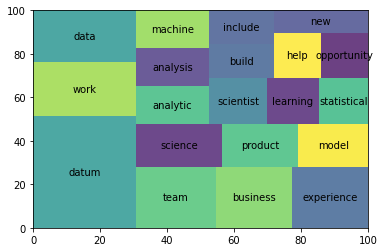

In [179]:
import squarify

squarify.plot(sizes=word_frequencies['Percent of Total'][:20], label=word_frequencies['Token'][:20], alpha=.8)


In [160]:
import seaborn as sns

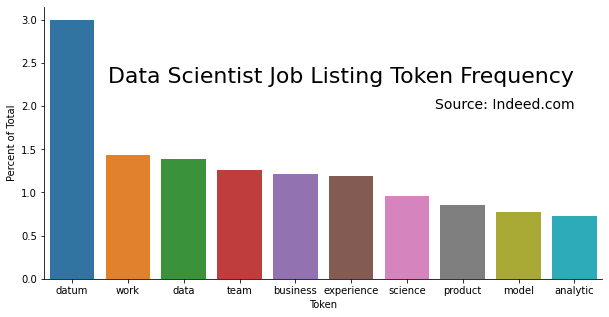

In [199]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="Token",y="Percent of Total", data=word_frequencies[:10], ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.title("Data Scientist Job Listing Token Frequency", size=22, y=0.7,ha="right", x=0.95, weight=500)
plt.text(s="Source: Indeed.com", transform=ax.transAxes, x=0.95, y=0.625, ha="right", size=14)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####

In [201]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_space != True)]


In [204]:
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.975,
                        min_df=0.025,
                        tokenizer=tokenize)

dtm_tfdif = tfidf.fit_transform(ds_df['cleaned_description'])
dtm_tfdif_df = pd.DataFrame(dtm_tfdif.todense(), columns=tfidf.get_feature_names())
dtm_tfdif_df.head()


,$,+,+ year,1,10,100,12,2,2 year,2019,...,year,year experience,year hand,year industry,year professional,year relevant,year work,york,york city,you\'ll
0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.120362,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.035374,0.03760,0.133384,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.024397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.234479,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.032234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.163925,0.17424,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.113058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
dtm_tfdif_df.shape


(426, 2103)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####

In [207]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfdif_df)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [270]:
ideal_job_description = ["Entry-level. Python. SQL. Linux. Git. AWS."]
new = tfidf.transform(ideal_job_description)

In [271]:
results = nn.kneighbors(new.todense())


In [272]:
results[1][0][0]

222

In [273]:
ds_df["cleaned_description"][results[1][0][0]]

"b'Overview1Strategy is an AWS-only consultancy focused on empowering our customers to innovate and build better on AWS. We are a nimble, collaborative company where anyone can make a significant contribution to our business. At 1Strategy you will have the opportunity to learn AWS services in depth and solve ground breaking problems with real-world impact for our customers. We specialize in data and analytics, infrastructure as code, and cloud-native application architecture.1Strategy is looking for a Data Scientist who can collaborate directly with customers seeking to integrate AWS Machine Learning solutions directly into their business. Do you have solid experience in a variety of data analysis methods, development tools, and implementing statistical models? Ideally, you will also be comfortable with the cleansing and preparation of the data theyre tasked with analyzing, using development standard methodologies, quality code, and AWS Services. If this sounds like you, we would love 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 